By: Misac Andrade Luna
#Project description
In this project, you will work with the titanic data set, which contains measures of different characteristics and categories and types.  He
Objective is to clean the data, explore the characteristics and visualize the relationships between them, perform the EDA and descriptive statistics.

## Description of the characteristics of the titanic data set

The titanic data set

This data set is widely used for automatic learning exercises and statistical analysis, since it allows exploring prepr Marcing, visualization and predictive modeling techniques.


## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load the data set

In [ ]:
df1 = sns.load_dataset('titanic')

## Initial data exploration
Titanic's data set can be loaded directly from Seaborn:

In [ ]:

# DATASET GENERAL INFORMATION

df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


From this step we take that we have of 890 data, in 15 columns.

In [ ]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


This command describes us, how many data we have with 'Count', the minímo value with min and the maximum value such as 'Max', -std is for the standard deviation, 50% is the median and 75% is for the third quartile.

In [ ]:
# Statistically describe the numerical characteristics
print(df1.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## 2. Identification and management of missing values


### Identify missing values

In [ ]:
missing_values = df1.isnull().sum()

print("Missing values by column:")
print(missing_values)

Missing values by column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


What null values found and why they decided to impute, eliminate them or handle them in another way?
The null values found are age with 177 null data, deck with 688
and Eck_Town with only 2 null values, the column will be eliminated with null stells that would be deck and there to use functions to fill the null values respectively.
What changes did they make in the data and how will this affect your subsequent analysis?


We decided:
- Impute the `AGE` values using the median to keep the robustness against outliers.
- Eliminate the `deck` column due to the large amount of null values.
- Impute `Eck_Town` in mode, since there are only 2 null values.


In [ ]:
# Impute null values
df1['age'].fillna(df1['age'].median(), inplace=True)
df1['embark_town'].fillna(df1['embark_town'].mode()[0], inplace=True)
df1.drop(columns='deck', inplace=True)


/tmp/ipython-input-2718173850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age'].fillna(df1['age'].median(), inplace=True)
/tmp/ipython-input-2718173850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

### Imputation of null values
We make the imputation of null values for `Age` and` Eck_Town`. The column `deck` was eliminated due to the large amount of missing data.


In [ ]:
missing_values = df1.isnull().sum()

print("Missing values by column:")
print(missing_values)

Missing values by column:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [ ]:
# DATASET GENERAL INFORMATION

df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## 3. Data transformation:

#**Standardization:**

Climb the numerical variables (such as rate and age) using normalization or standardization methods.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Age' and 'Fare' columns
scaler = MinMaxScaler()
df1[['age', 'fare']] = scaler.fit_transform(df1[['age', 'fare']])


### Standardization
We normalize the `AGE` and` FARE` variables to climb their values between 0 and 1. This helps the numerical variables to be in a comparable range, facilitating their use in automatic learning models.


In [ ]:
# One-Hot coding
df1 = pd.get_dummies(df1, columns=['sex', 'embarked', 'class', 'who', 'embark_town'])


### One-Hot coding
We apply One-Hot coding to categorical variables to transform them into an adequate format for posterior analysis and modeling. This is essential for models to process these variables effectively.


#Exploratory Data Analysis (EDA):

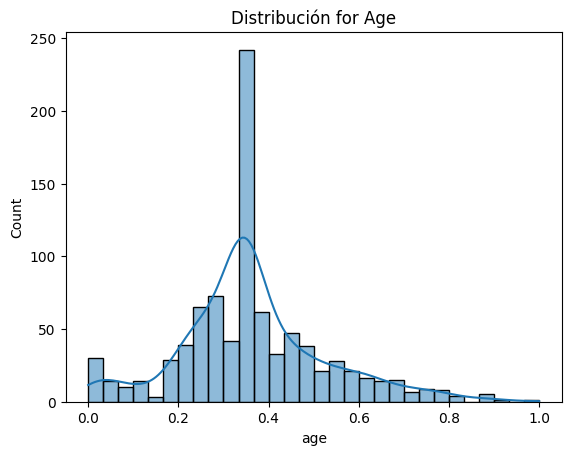

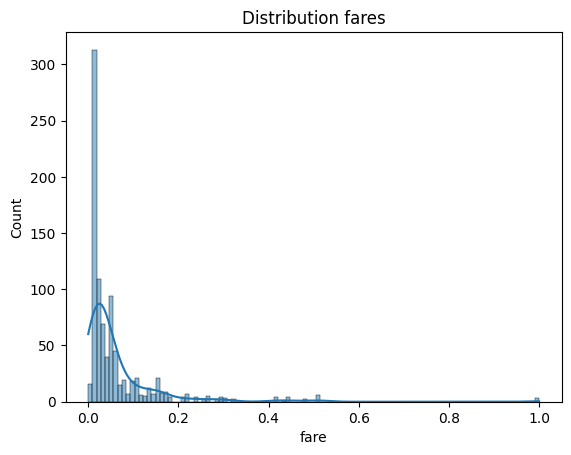

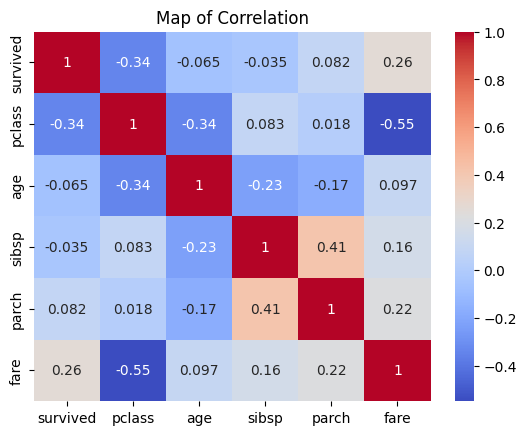

In [ ]:
# Description of the variables
df1.describe()

# Graph distributions
sns.histplot(df1['age'], kde=True)
plt.title('Distribución for Age')
plt.show()

sns.histplot(df1['fare'], kde=True)
plt.title('Distribution fares')
plt.show()

# Heatmap of correlations
# Select only columns for correlation calculation
numeric_df1 = df1.select_dtypes(include=['number'])
sns.heatmap(numeric_df1.corr(), annot=True, cmap='coolwarm')
plt.title('Map of Correlation')
plt.show()



### Exploratory data analysis (EDA)
We observe the distributions of the main variables such as `AGE` and` FARE`, and create a heat map to visualize the correlations between the variables.


##Statistical Scriptive

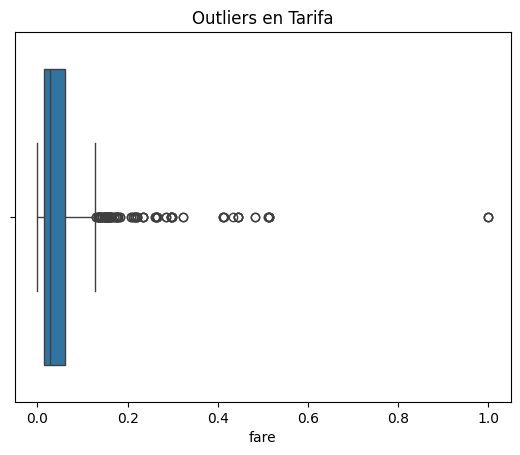

In [ ]:
# Statistical moments
df1[['age', 'fare']].describe()

# Outliers identification
sns.boxplot(x=df1['fare'])
plt.title('Outliers en Tarifa')
plt.show()


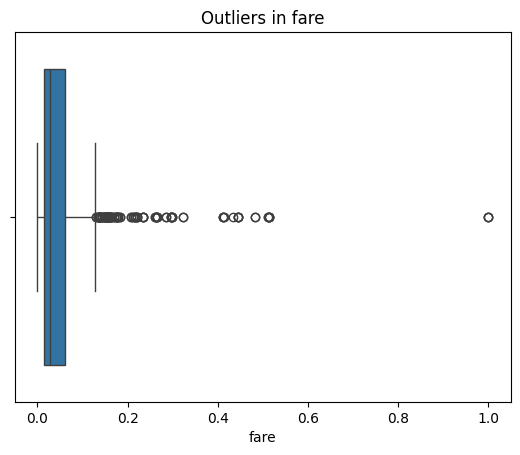

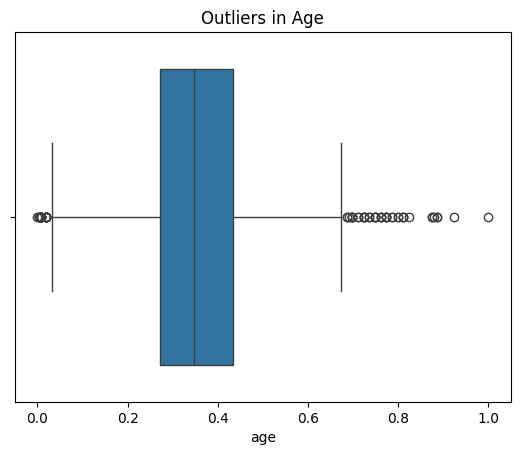

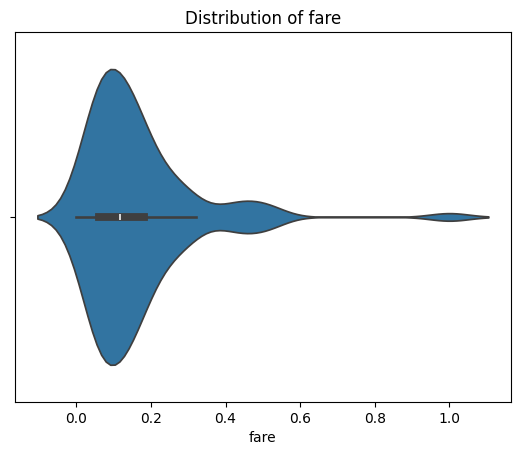

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that you already have the dataframe `df1`
sns.boxplot(x=df1['fare'])
plt.title('Outliers in fare')
plt.show()
# Assuming that you already have the dataframe `df1`
sns.boxplot(x=df1['age'])
plt.title('Outliers in Age')
plt.show()

# Filter first -class passengers
df_first_class = df1[df1['class_First'] == 1]

# Create violin graph for the first -class passenger rate
sns.violinplot(x=df_first_class['fare'])
plt.title('Distribution of fare')
plt.show()


In [ ]:
# Save DataFrame DF1 in a CSV file
df1.to_csv('/content/cleantitanic.csv', index=False)

print("The CSV file has been saved and is ready to download.")


The CSV file has been saved and is ready to download.


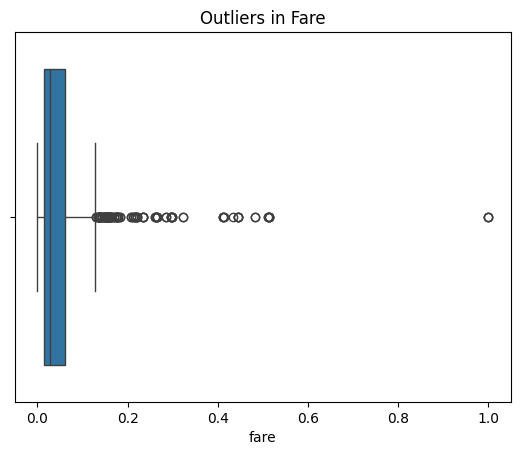

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that you already have the dataframe `df1`
sns.boxplot(x=df1['fare'])
plt.title('Outliers in Fare')
plt.show()

### Descriptive statistics
We calculate the key statistical moments such as median, median, and standard deviation. We identify outliers in `Fare` using a cash diagram.


What do these statistical moments mean in the context of Dataset Titanic?
That depending on the median, medium or asymmetry, the values go out with some outliers and to correct this.

What variables seem to have extreme values and how could they be handled?
One of our data from the 14 columns is FARE since it has its maximum data in 512 so this when compared to another graph can cause outliers in comparative graphs.


#9 Conlusions.


Data cleaning:

Null values were detected in the Age, Deck and Eck_Town columns. The missing values in AGE were imputed using the median and Eck_Town with the mode. The Deck column was eliminated due to the high percentage of missing data, which would have compromised the quality of the analysis.
Data transformation:

Age and FAR variables were normalized to climb them between 0 and 1, facilitating comparisons and improving performance in predictive models.
The categorical variables were coded with One-Hot Encoding, allowing their inclusion in future analysis models.
Exploratory Data Analysis (EDA):

AGE and FARE distributions showed significant differences, with FARE showing a biased distribution and presence of outliers.
The correlation heat map highlighted key relationships between numerical variables, providing valuable information for future analysis.
Descriptive statistics and outliers:

Statistical measures such as median, median and standard deviation were calculated, which described the dispersion of the data.
Significant outliers were identified in FARE, suggesting the need for additional techniques to reduce their impact on models.